<a href="https://colab.research.google.com/github/gabrielurbanin/analise-crimes-rj/blob/master/Analisando_crimes_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do histórico de crime contra propriedade no Rio de Janeiro

<img alt="Colaboratory logo" width="200%" src="https://raw.githack.com/gabrielurbanin/analise-crimes-rj/master/fundo_crimes_rj.png">

  

O Rio de Janeiro é, sem dúvidas, um dos estados brasileiros mais conhecidos pelo mundo, e também por todo território nacional. Afinal, o estado abriga pontos turísticos reconhecidos mundialmente - como o Cristo Redentor, o pão de açucar e a praia de copacabana - além de ser lar dos principais desfiles de carnaval do país.

Entretanto, o Rio de Janeiro também é famoso por seus índices de criminalidade. De acordo com dados do 11º Anuário de Segurança Pública, publicado pelo Fórum Brasileiro de Segurança Pública em 2017, o Rio de Janeiro foi considerado o décimo estado mais violento do Brasil.

Trazendo para o cenário atual, conforme levantamento do Grupo Tracker - empresa de rastreamento e localização de veículos - realizado no mês de Abril de 2020, mesmo durante a pandemia de Covid-19, o índice de roubos e furtos de motocicletas aumentou 200% no estado carioca.

Devido a esses fatores, neste notebook analisarei o histórico de crimes contra a propriedade, tendo foco em veículos, no estado do Rio de Janeiro entre os anos de 1991 e 2019.



## Obtenção dos Dados


Os dados para essa análise foram obtidos diretamente do site do Instituto de Segurança Pública para o estado do Rio de Janeiro, que você pode acessar [clicando neste link](http://www.ispdados.rj.gov.br/estatistica.html)



### Importando os dados

O arquivo csv que será importado é o "Estatísticas de segurança: série histórica mensal no estado desde 01/1991".

Antes de qualquer coisa, será necessário importar a biblioteca `pandas` que facilita o tratamento e a análise dos dados com python, para então adicionar o csv a um _DataFrame_.

In [1]:
# Importando pandas

import pandas as pd

In [2]:
# Adicionando o csv a um DataFrame

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

## Análise Inicial dos Dados

Inicialmente, irei tomar noção das dimensões do nosso _DataFrame_ e de como os dados estão organizados nas colunas.



In [3]:
# Verificando tamanho do DataFrame

df.shape

(344, 56)

Logo, possuimos 344 entradas e 56 variáveis para cada uma delas. No entanto, o foco da minha análise são os dados sobre crimes contra a propriedade (veículos), então preciso verificar quais variáveis irão ser úteis no processo.


In [4]:
# Listando todas as variáveis do DataFrame

df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Dessa forma, as variáveis que serão úteis são:
- `ano`: ano de coleta daquele dado.
- `mes`: mês de coleta daquele dado.
- `roubo_veiculos`: quantidade de veículos roubados naquele mês.
- `furto_veiculos`: quantidade de veículos furtados naquele mês.
- `recuperacao_veiculos`: quantidade de veículos recuperados pela polícia naquele mês.

Nesse caso, é importante ressaltar a diferença entre furto e roubo: no furto, não há episódio de violência ou ameaça contra a vítima. Já o roubo consiste na ocorrência de ameaça ou violência contra quem está sendo roubado (sinônimo de assalto).

Após corrigir o nome de algumas variáveis com o propósito de padronizar o _DataFrame_, irei mostrar as 5 primeiras entradas para ter uma noção de como os dados estão dispostos:

In [ ]:
# Renomeando variáveis

df = df.rename(columns= {'vano':'ano', 'roubo_veiculo':'roubo_veiculos'})

# Mostrando as 5 primeiras entradas do DataFrame

df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculos,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Como só preciso das variáveis que citei a cima, irei criar um novo _DataFrame_ `df_veiculos` que contém somente essas variáveis. Para isso, basta criar uma cópia de `df` selecionando as colunas que quero copiar com o método `copy()`:

In [ ]:
# Criando uma cópia do DataFrame original com as variáveis necessárias

df_veiculos = df[['ano','roubo_veiculos', 'furto_veiculos', 'recuperacao_veiculos']].copy()

# Mostrando as 5 primeiras entradas do novo DataFrame

df_veiculos.head()

,ano,roubo_veiculos,furto_veiculos,recuperacao_veiculos
0,1991,1174,2009,872
1,1991,1097,1850,751
2,1991,1265,2084,789
3,1991,1415,2085,787
4,1991,1449,2185,845


In [ ]:
# Verificando os tipos dos dados de cada variável

df_veiculos.dtypes

ano                     int64
roubo_veiculos          int64
furto_veiculos          int64
recuperacao_veiculos    int64
dtype: object

Além disso, também é necessário verificar se o _dataset_ não está comprometido pela ausência de valores:


In [ ]:
# Verificando se há valores ausentes no DataFrame

df_veiculos.isnull().sum() / df.shape[0] 

ano                     0.0
roubo_veiculos          0.0
furto_veiculos          0.0
recuperacao_veiculos    0.0
dtype: float64

Não há nenhum valor ausente para as variáveis, então posso prosseguir para a retirada de informações estatísticas dos dados.

## Informações Estatísticas do crime contra propriedade no Rio de Janeiro

Inicialmente, irei usar o método `describe()` para retirar dados estatísticos sobre cada variável.

In [ ]:
# Dados estatísticos sobre cada variável

df_veiculos.describe()

,ano,roubo_veiculos,furto_veiculos,recuperacao_veiculos
count,344.000000,344.000000,344.000000,344.000000
mean,2004.837209,2448.697674,1674.671512,1772.238372
std,8.289036,789.689559,294.852020,656.761843
min,1991.000000,1097.000000,1159.000000,729.000000
25%,1998.000000,1889.750000,1430.500000,1276.750000
50%,2005.000000,2322.000000,1637.500000,1755.000000
75%,2012.000000,2778.000000,1833.250000,2202.000000
max,2019.000000,5358.000000,2630.000000,3695.000000


Agora, irei verificar se nossos dados possuem _outiliers_ que podem ter comprometido as estimativas de localização obtidas a cima.

Para isso, irei criar duas funções:
- `median()` que retorna a mediana de uma variável
- `outliersFromCol()` que mostra quantos _outliers_ estão presentes em cada variável, além dos valores a partir dos quais esses _outliers_ são encontrados.

In [ ]:
# Função para calcular a mediana de qualquer variável (coluna) do DataFrame
# Parâmetros:
# - var -> coluna do DataFrame
# Retorno:
# - result -> mediana dos valores da coluna

def median(var):
  for i in var:
    if not isinstance(i,(int,float)):
      return

  var = list(var)
  var.sort()
  var_size = len(var)

  if var_size % 2 == 0:
    result = (var[var_size//2 - 1] + var[var_size//2]) / 2
  else:
    result = var[var_size//2]

  return result

In [ ]:
# Função para detectar os valores máximo e mínimo de uma variável onde não há outliers
# Parâmetros:
# - col -> coluna do DataFrame
# Retorno:
# - Não retorna nada, apenas printa os valores máximo e mínimo 
# e também quantos outliers a variável possui.

def outliersFromColumn(col):
  sorted_col = list(col)
  sorted_col.sort()
  size_col = len(sorted_col)
  half_col_inf = []
  half_col_sup = []

  for i in range(size_col):
    if (i == size_col//2) and (size_col % 2 != 0):
      continue
    elif i < (size_col//2):
      half_col_inf.append(sorted_col[i])
    else:
      half_col_sup.append(sorted_col[i])

  Q1 = median(half_col_inf)
  Q2 = median(sorted_col)
  Q3 = median(half_col_sup)

  IQR = Q3 - Q1
  outlier_inf = Q1 - 1.5 * IQR
  outlier_sup = Q3 + 1.5 * IQR

  outlier_count = col[col > outlier_sup].count() + col[col < outlier_inf].count()

  print("Todos os valores abaixo de {} e acima de {} podem ser considerados outliers para essa variável.\nQuantidade de outliers: {}".format(outlier_inf, outlier_sup, outlier_count))

Aplicando a função `outliersFromCol` para cada uma das variáveis do _DataFrame_:

In [ ]:
# Outliers da variável roubo_veiculos

outliersFromColumn(df_veiculos.roubo_veiculos) 

Todos os valores abaixo de 555.25 e acima de 4113.25 podem ser considerados outliers para essa variável.
Quantidade de outliers: 20


Para comprovar esses valores, basta plotar um boxplot para a variável, onde os _outliers_ são facilmente visiveis:

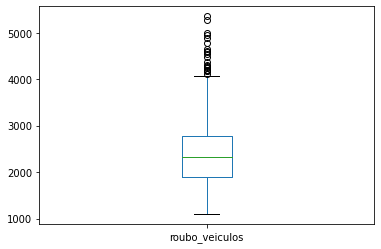

In [ ]:
# BoxPlot para a variável roubo_veiculos

df_veiculos.roubo_veiculos.plot(kind='box');

In [ ]:
# Outliers da variável furto_veiculos

outliersFromColumn(df_veiculos.furto_veiculos)

Todos os valores abaixo de 824.75 e acima de 2438.75 podem ser considerados outliers para essa variável.
Quantidade de outliers: 5


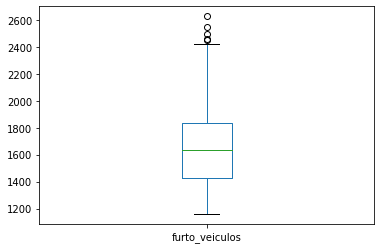

In [ ]:
# BoxPlot para a variável furto_veiculos

df_veiculos.furto_veiculos.plot(kind='box');

In [ ]:
 # Outliers da variável recuperacao_veiculos

outliersFromColumn(df_veiculos.recuperacao_veiculos)

Todos os valores abaixo de -114.75 e acima de 3595.25 podem ser considerados outliers para essa variável.
Quantidade de outliers: 1


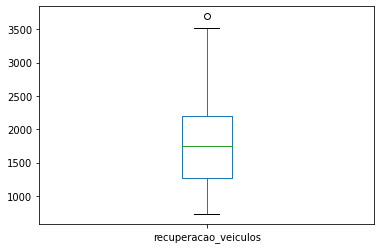

In [ ]:
# BoxPlot para a variável recuperacao_veiculos

df_veiculos.recuperacao_veiculos.plot(kind='box');

Como a única variável que apresenta uma quantidade significativa de _outliers_ é a `roubo_veiculos`, irei substituir esses valores extremos pela mediana de todos os valores da coluna, já que ela é uma estimativa de localização robusta (não é sensível a _outliers_). Dessa forma, evito de deletar entradas e os dados se tornam mais confiáveis para a análise.

Para as outras duas variáveis em questão, não há problemas em remover as entradas que contém _outliers_, já que seu número é pouco expressívo, então é isso que farei.

In [ ]:
# Substituindo os outliers pela mediana na variável roubo_veiculos

mediana_roubo_veiculos = int(median(df_veiculos.roubo_veiculos))
df_veiculos.loc[df_veiculos.roubo_veiculos > 4113.25, 'roubo_veiculos'] = mediana_roubo_veiculos

In [ ]:
# Eliminando as entradas que contém outliers na variável furto_veiculos

df_veiculos.drop(df_veiculos[df_veiculos.furto_veiculos > 2438.75].index, inplace=True)

In [ ]:
# Eliminando as entradas que contém outliers na variável recuperacao_veiculos

df_veiculos.drop(df_veiculos[df_veiculos.recuperacao_veiculos > 3595.25].index, inplace=True)

Agora é possível encontrarmos a média de veículos roubados, furtados e recuperados por mês no Rio de Janeiro entre 1991 e 2019 sem nos preocuparmos com a confiabilidade dessa estimativa:

In [ ]:
# Média da variável roubo_veiculos

print("Uma média de {:.0f} veículos foram roubados por mês entre 1991 e 2019 no Rio de Janeiro.".format(df_veiculos.roubo_veiculos.mean()))

Uma média de 2316 veículos foram roubados por mês entre 1991 e 2019 no Rio de Janeiro.


In [ ]:
# Média da variável furto_veiculos

print("Uma média de {:.0f} veículos foram furtados por mês entre 1991 e 2019 no Rio de Janeiro.".format(df_veiculos.furto_veiculos.mean()))

Uma média de 1663 veículos foram furtados por mês entre 1991 e 2019 no Rio de Janeiro.


In [ ]:
# Média da variável recuperacao_veiculos

print("Uma média de {:.0f} veículos foram recuperados por mês entre 1991 e 2019 no Rio de Janeiro.".format(df_veiculos.recuperacao_veiculos.mean()))

Uma média de 1775 veículos foram recuperados por mês entre 1991 e 2019 no Rio de Janeiro.


Além disso, é possível calcular a taxa (%) com que os veículos foram recuperados pela polícia durante todos os meses e tirar a média:

In [ ]:
# Média da taxa de recuperação de veículos por mês

taxa_recuperacao_mensal = df_veiculos.recuperacao_veiculos.mean() / (df_veiculos.roubo_veiculos.mean() + df_veiculos.furto_veiculos.mean()) * 100
print("A taxa de recuperação de veículos furtados e roubados por mês foi de {:.1f}% no periodo analisado.".format(taxa_recuperacao_mensal))

A taxa de recuperação de veículos furtados e roubados por mês foi de 44.2% no periodo analisado.


Para uma análise mais completa, irei também verificar os dados correspondentes a cada ano no total. Para isso, irei criar um novo _DataFrame_ de nome `df_anual` com os dados em perspectiva anual.

Nesse _DataFrame_, irei adicinar mais duas variáveis:
- `total_crimes`: soma da quantidade de furtos e roubos naquele ano.
- `taxa_recuperacao`: taxa de recuperação de veículos pela polícia naquele ano.

In [ ]:
# Criando um novo DataFrame com os dados em perspectiva anual

ano = [i for i in range(1991,2020)]
ro_ve = list(df_veiculos.groupby('ano').roubo_veiculos.sum())
fu_ve = list(df_veiculos.groupby('ano').furto_veiculos.sum())
re_ve = list(df_veiculos.groupby('ano').recuperacao_veiculos.sum())

dic_df = {'ano': ano,
          'roubo_veiculos': ro_ve,
          'furto_veiculos': fu_ve,
          'recuperacao_veiculos' : re_ve}

df_anual = pd.DataFrame(data=dic_df)

df_anual.set_index(['ano'], inplace=True)

df_anual['total_crimes'] = df_anual.roubo_veiculos + df_anual.furto_veiculos
df_anual['taxa_recuperacao'] = df_anual.recuperacao_veiculos/df_anual.total_crimes

# Mostrando as 5 primeiras entradas do DataFrame

df_anual.head()

,roubo_veiculos,furto_veiculos,recuperacao_veiculos,total_crimes,taxa_recuperacao
ano,,,,,
1991,16452,23979,9890,40431,0.244614
1992,24502,27619,11246,52121,0.215767
1993,24790,26897,11619,51687,0.224795
1994,27470,26231,16030,53701,0.298505
1995,23676,21928,17622,45604,0.386413


Assim, posso verificar em quais anos as taxas de recuperação de veículos foram mais altas e mais baixas:

In [ ]:
# Verificando os valores máximo e mínimo para a taxa de recuperação de veículos

recuperacao_max = df_anual.taxa_recuperacao.max()
recuperacao_min = df_anual.taxa_recuperacao.min()

print("A maior taxa de recuperação de veículos foi de {:.1f}% no ano de 2017\nA menor foi de {:.1f}% no ano de 1992".format(recuperacao_max*100,recuperacao_min*100))

A maior taxa de recuperação de veículos foi de 86.4% no ano de 2017
A menor foi de 21.8% no ano de 1992


Com esses valores, é possível formular a hipótese de que a eficiência da polícia tem melhorado ao longo dos anos no combate aos furtos e roubos de veículos. Mas, para que essa hipótese seja confirmada, seria necessária uma análise mais detalhada.

## Visualização de Dados

Para facilitar a elaboração de conclusões a respeito dos valores obtidos na análise a cima, é importante plotar gráficos que facilitem a visualização desses dados:


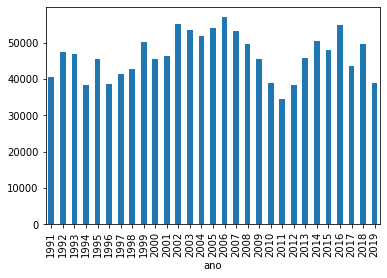

In [ ]:
# Gráfico de barras para a quantidade de crimes contra propriedade em cada ano

df_anual.total_crimes.plot.bar();

O gráfico a cima mostra que o total de crimes oscilou ao longo das últimas duas décadas. No entanto, ao final do período, pode-se dizer que foi um comportamento oscilatório lateral, onde as oscilações aconteceram dentro de um certo limite superior e inferior (no caso, por volta de 35 e 60 mil crimes), não apresentando nenhuma tendência signficativa de alta ou baixa nos valores.

O gráfico abaixo é um histograma com a frequencia de valores para a variável `total_crimes`, complementando o gráfico de barras supracitado.

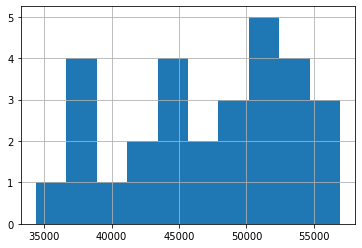

In [ ]:
# Histograma para a quantidade de crimes contra propriedade em cada ano

df_anual.total_crimes.hist();

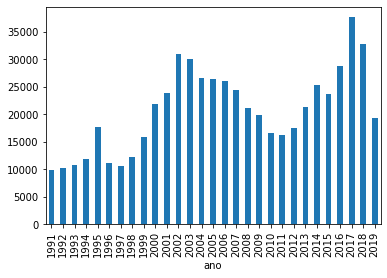

In [ ]:
# Gráfico de barras para a taxa de recuperação de veículos pela polícia em cada ano

df_anual.recuperacao_veiculos.plot.bar();

Ao contrário do gráfico sobre a quantidade de crimes totais por ano, o gráfico a cima mostra que a recuperação de veículos pela polícia tem apresentado uma tendência de alta, apesar das oscilações. Esse fato é mais um indício de que a eficiência da força policial do Rio de Janeiro na recuperação de veículos pode ter melhorado ao longo dos anos.

## Conclusão


Essa foi apenas uma análise superficial sobre os números referentes ao crime contra a propriedade no Rio de Janeiro entre os anos de 1991 e 2019.

Como previsto inicialmente, os números realmente confirmam que o estado carioca sempre possuiu um índice de criminalidade alto que não apresenta tendência de quedas.

Entretanto, a forma como as autoridades têm lidado com esse fato se apresentou promissora, tendo uma alta na recuperação dos veículos no período analisado.